## Observations and Insights 

In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# mouse_metadata
# study_results

combined_DF = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how='left')

combined_DF.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [2]:
# Checking the number of mice in the DataFrame.
combined_DF["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupindexes = combined_DF[combined_DF[["Mouse ID", "Timepoint"]].duplicated()]
dupindexes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_DF = combined_DF.drop(dupindexes.index)
combined_DF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
combined_DF["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_DF = combined_DF.groupby(['Drug Regimen'])
grouped_DF1 = grouped_DF["Tumor Volume (mm3)"].mean()
grouped_DF2 = grouped_DF["Tumor Volume (mm3)"].median()
grouped_DF3 = grouped_DF["Tumor Volume (mm3)"].std()
grouped_DF4 = grouped_DF["Tumor Volume (mm3)"].sem()
grouped_DF5 = grouped_DF["Tumor Volume (mm3)"].var()

summary_tum_volumeDF = pd.merge(grouped_DF1, grouped_DF2, how='left', left_index=True, right_index=True, suffixes=['_1','_2'])
summary_tum_volumeDF = pd.merge(summary_tum_volumeDF, grouped_DF3, how='left', left_index=True, right_index=True, suffixes=['_3','_4'])
summary_tum_volumeDF = pd.merge(summary_tum_volumeDF, grouped_DF4, how='left', left_index=True, right_index=True, suffixes=['_5','_6'])
summary_tum_volumeDF = pd.merge(summary_tum_volumeDF, grouped_DF5, how='left', left_index=True, right_index=True, suffixes=['_7','_8'])

summary_tum_volumeDF = summary_tum_volumeDF.rename(columns={'Tumor Volume (mm3)_1':'Mean',
                                                            'Tumor Volume (mm3)_2':'Median',
                                                            'Tumor Volume (mm3)_5':'Std Dev',
                                                            'Tumor Volume (mm3)_6':'SEM',
                                                            'Tumor Volume (mm3)':'Variance',
                                                           })

summary_tum_volumeDF

,Mean,Median,Std Dev,SEM,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.393463,50.909965,6.568014,0.525862,43.138803
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

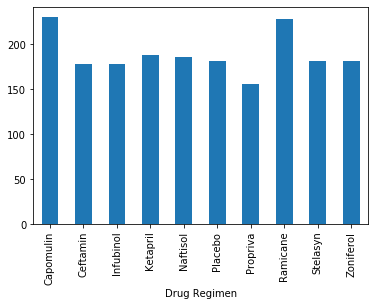

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapointsDF = grouped_DF["Mouse ID"].count()
datapointsDF.plot.bar()
plt.show()

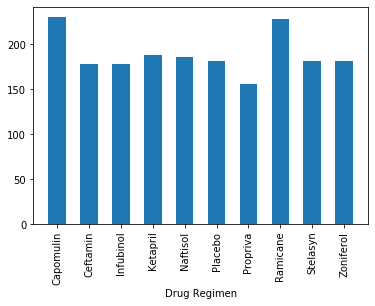

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# datapointsDF2 = 
plt.bar(datapointsDF.index.values,datapointsDF.values, width=.55)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.show()


## Pie Plots

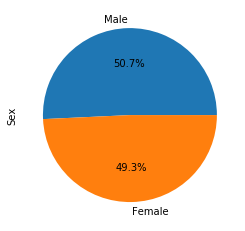

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieDF = combined_DF["Sex"].value_counts()
pieDF.plot.pie(autopct='%1.1f%%')
plt.show()

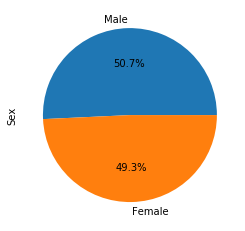

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(pieDF,labels=labels,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
agebins = [1,7,13,20,25]
agelabels = ['< 7 Mos.','7-13 Mos.','14-20 Mos.','21-25 Mos.']
weightbins = [15, 25, 27, 29, 30]
weightlabels = ['15-25 g','26-27 g','28-29 g','30 g']

weight_cut_DF =  pd.cut(combined_DF["Weight (g)"], weightbins, labels=weightlabels, right=True)
age_cut_DF =  pd.cut(combined_DF["Age_months"], agebins, labels=agelabels, right=True)

cut_DF = pd.merge(weight_cut_DF, combined_DF, how='left', left_index=True, right_index=True)
cut_DF = pd.merge(cut_DF, age_cut_DF, how='left', left_index=True, right_index=True)
# cut_DF

In [14]:
most_promising_regimeDF1 = cut_DF[['Drug Regimen', 'Sex', 'Timepoint', 'Metastatic Sites']]
most_promising_regimeDF1 = most_promising_regimeDF1.pivot_table(index=['Drug Regimen'], columns=['Timepoint'])

most_promising_regimeDF1


Metastatic Sites                                          \
Timepoint                  0         5         10        15        20   
Drug Regimen                                                            
Capomulin                 0.0  0.160000  0.320000  0.375000  0.652174   
Ceftamin                  0.0  0.380952  0.600000  0.789474  1.111111   
Infubinol                 0.0  0.280000  0.666667  0.904762  1.050000   
Ketapril                  0.0  0.304348  0.590909  0.842105  1.210526   
Naftisol                  0.0  0.260870  0.523810  0.857143  1.150000   
Placebo                   0.0  0.375000  0.833333  1.250000  1.526316   
Propriva                  0.0  0.333333  0.590909  0.812500  1.000000   
Ramicane                  0.0  0.120000  0.250000  0.333333  0.347826   
Stelasyn                  0.0  0.260870  0.523810  0.809524  0.947368   
Zoniferol                 0.0  0.166667  0.500000  0.809524  1.294118   

                                                                
Timepoint           25        30        35        40        45  
Drug Regimen                                                    
Capomulin     0.818182  1.090909  1.181818  1.380952  1.476190  
Ceftamin      1.500000  1.937500  2.071429  2.357143  2.692308  
Infubinol     1.277778  1.588235  1.666667  2.100000  2.111111  
Ketapril      1.631579  2.055556  2.294118  2.733333  3.363636  
Naftisol      1.500000  2.066667  2.266667  2.466667  2.538462  
Placebo       1.941176  2.266667  2.642857  3.166667  3.272727  
Propriva      1.357143  1.615385  2.300000  2.777778  2.571429  
Ramicane      0.652174  0.782609  0.952381  1.100000  1.250000  
Stelasyn      1.166667  1.411765  1.533333  1.583333  1.727273  
Zoniferol     1.687500  1.933333  2.285714  2.785714  3.071429

In [15]:
most_promising_regimeDF2 = cut_DF[['Drug Regimen', 'Sex', 'Timepoint', 'Tumor Volume (mm3)']]
most_promising_regimeDF2 = most_promising_regimeDF2.pivot_table(index=['Drug Regimen'], columns=['Timepoint'])

most_promising_regimeDF2

Tumor Volume (mm3)                                              \
Timepoint                    0          5          10         15         20   
Drug Regimen                                                                  
Capomulin                  45.0  44.266086  43.084291  42.064317  40.716325   
Ceftamin                   45.0  46.503051  48.285125  50.094055  52.157049   
Infubinol                  45.0  46.541247  49.403909  51.296397  53.197691   
Ketapril                   45.0  47.389175  49.582269  52.399974  54.920935   
Naftisol                   45.0  46.796098  48.694210  50.933018  53.644087   
Placebo                    45.0  47.125589  49.423329  51.359742  54.364417   
Propriva                   45.0  47.235574  49.066132  50.918900  53.264805   
Ramicane                   45.0  43.944859  42.531957  41.495061  40.238325   
Stelasyn                   45.0  47.470830  49.335368  51.448025  53.970080   
Zoniferol                  45.0  46.851818  48.689881  50.779059  53.170334   

                                                                     
Timepoint            25         30         35         40         45  
Drug Regimen                                                         
Capomulin     39.939528  38.769339  37.816839  36.958001  36.236114  
Ceftamin      54.287674  56.769517  58.827548  61.467895  64.132421  
Infubinol     55.715252  58.299397  60.742461  63.162824  65.755562  
Ketapril      57.678982  60.994507  63.371686  66.068580  70.662958  
Naftisol      56.731968  59.559509  62.685087  65.600754  69.265506  
Placebo       57.482574  59.809063  62.420615  65.052675  68.084082  
Propriva      55.504138  58.196374  60.350199  63.045537  66.258529  
Ramicane      38.974300  38.703137  37.451996  36.574081  34.955595  
Stelasyn      56.172821  59.870528  62.432021  65.356386  68.438310  
Zoniferol     55.432935  57.713531  60.089372  62.916692  65.960888

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
filteredDF = combined_DF.loc[((combined_DF["Drug Regimen"] == "Ramicane") |
                             (combined_DF["Drug Regimen"] == "Capomulin") |
                             (combined_DF["Drug Regimen"] == "Infubinol") |
                             (combined_DF["Drug Regimen"] == "Ceftamin"))
                            ]
# filteredDF
filteredDF_max = filteredDF.drop(filteredDF[filteredDF[["Mouse ID"]].duplicated(keep='last')].index)
filteredDF_max = filteredDF_max[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]]
filteredDF_max


,Mouse ID,Tumor Volume (mm3),Drug Regimen
182,u153,45.000000,Ceftamin
194,b447,45.000000,Ceftamin
217,x226,45.000000,Ceftamin
222,t573,45.000000,Ceftamin
420,c326,36.321346,Infubinol
...,...,...,...
1879,a644,32.978522,Ramicane
1885,i177,33.562402,Ramicane
1888,r944,41.581521,Capomulin
1889,u364,31.023923,Capomulin


In [17]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

ramicaneDF = filteredDF_max[filteredDF_max["Drug Regimen"]=="Ramicane"]
ramicaneDF = ramicaneDF[["Tumor Volume (mm3)"]]

quartiles = ramicaneDF.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25][0]
upperq = quartiles.loc[.75][0]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

potential_high_outliers = ramicaneDF[ramicaneDF["Tumor Volume (mm3)"] > upper_bound]
potential_low_outliers = ramicaneDF[ramicaneDF["Tumor Volume (mm3)"] > lower_bound]

# potential_high_outliers
# potential_low_outliers


Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [18]:
ceftaminDF = filteredDF_max[filteredDF_max["Drug Regimen"]=="Ceftamin"]
ceftaminDF = ceftaminDF[["Tumor Volume (mm3)"]]

quartiles = ceftaminDF.quantile([.25,.5,.75])
# quartiles 
lowerq = quartiles.loc[0.25][0]
upperq = quartiles.loc[.75][0]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

potential_high_outliers = ceftaminDF[ceftaminDF["Tumor Volume (mm3)"] > upper_bound]
potential_low_outliers = ceftaminDF[ceftaminDF["Tumor Volume (mm3)"] > lower_bound]

# potential_high_outliers
# potential_low_outliers

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [19]:
capomulinDF = filteredDF_max[filteredDF_max["Drug Regimen"]=="Capomulin"]
capomulinDF = capomulinDF[["Tumor Volume (mm3)"]]

quartiles = capomulinDF.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25][0]
upperq = quartiles.loc[.75][0]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

potential_high_outliers = capomulinDF[capomulinDF["Tumor Volume (mm3)"] > upper_bound]
potential_low_outliers = capomulinDF[capomulinDF["Tumor Volume (mm3)"] > lower_bound]

# potential_high_outliers
# potential_low_outliers

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
infubinolDF = filteredDF_max[filteredDF_max["Drug Regimen"]=="Infubinol"]
infubinolDF = infubinolDF[["Tumor Volume (mm3)"]]

quartiles = infubinolDF.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25][0]
upperq = quartiles.loc[.75][0]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

potential_high_outliers = infubinolDF[infubinolDF["Tumor Volume (mm3)"] > upper_bound]
potential_low_outliers = infubinolDF[infubinolDF["Tumor Volume (mm3)"] > lower_bound]

# potential_high_outliers
# potential_low_outliers

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


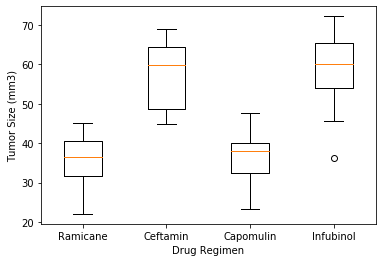

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
labels = ["Ramicane", "Ceftamin", "Capomulin", "Infubinol"]
data = [ramicaneDF.values.flatten(),
        ceftaminDF.values.flatten(),
        capomulinDF.values.flatten(),
        infubinolDF.values.flatten()
        ]
ax = fig.add_subplot(111)
bp = ax.boxplot(data, labels=labels, showfliers=True)
ax.set_ylabel("Tumor Size (mm3)")
ax.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

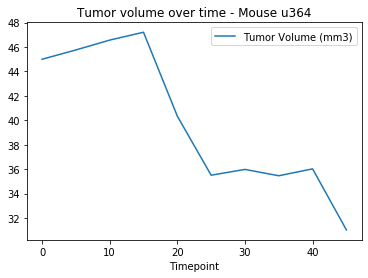

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseCapoDF = filteredDF[filteredDF["Mouse ID"]=="u364"]
mouseCapoDF = mouseCapoDF[["Timepoint", "Tumor Volume (mm3)"]]
mouseCapoDF.plot(x='Timepoint',y='Tumor Volume (mm3)')
plt.title("Tumor volume over time - Mouse u364")
plt.show()


correlation coefficient: 0.84
y = 0.95x + 21.55


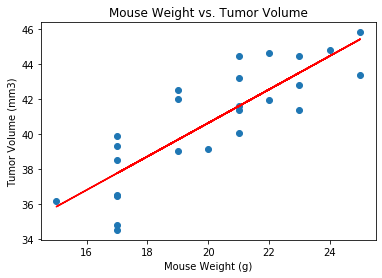

In [40]:
## Correlation and Regression
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
filteredDF = filteredDF[filteredDF["Drug Regimen"]=="Capomulin"]
scatterDF = filteredDF.groupby("Mouse ID")
scatterDF = scatterDF.mean()

plt.scatter(scatterDF.iloc[:,4], scatterDF.iloc[:,1])

# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterDF.iloc[:,4], scatterDF.iloc[:,1])
print(f"correlation coefficient: {round(correlation[0],2)}")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatterDF.iloc[:,4], scatterDF.iloc[:,1])
regress_values = scatterDF.iloc[:,4] * slope + intercept
print(f"y = {str(round(slope,2))}x + {str(round(intercept,2))}")

plt.plot(scatterDF.iloc[:,4],regress_values,"r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Tumor Volume")
plt.show()
